In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Opening restaurant dataset
nyc_rest = pd.read_csv('resources/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [85]:
nyc_rest.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


*Note*: Code for evidence of rat is 04K

In [86]:
# Grouping by zipcode and counting the number of resaurants in each zip code
nyc_rest_grouped = nyc_rest.groupby(['BORO','ZIPCODE', 'RECORD DATE']).nunique()[['DBA', 'CAMIS']]
nyc_rest_grouped.reset_index(inplace=True)
nyc_rest_grouped.head()

,BORO,ZIPCODE,RECORD DATE,DBA,CAMIS
0,BRONX,10451.0,08/28/2017,143,161
1,BRONX,10452.0,08/28/2017,91,103
2,BRONX,10453.0,08/28/2017,89,99
3,BRONX,10454.0,08/28/2017,69,74
4,BRONX,10455.0,08/28/2017,99,110


In [87]:
# Removing columns
nyc_rest_grouped.rename(columns={'ZIPCODE': 'postalCode', 'DBA':'Restaurants', 'CAMIS': 'Violations'}, inplace=True)

In [88]:
# Renaming column
#nyc_rest_grouped.rename(columns={'CAMIS': 'Restaurants', 'BORO': 'Borough'})

In [89]:
# Grouping by zipcode and counting the number of violations in each zip code
nyc_rest_viol_grouped = nyc_rest.groupby(['BORO', 'DBA']).nunique()[['CAMIS']].reset_index()
nyc_rest_viol_grouped.head()

,BORO,DBA,CAMIS
0,BRONX,#1 SABOR LATINO RESTAURANT,1
1,BRONX,1 Banana Queen,1
2,BRONX,100% JUICE BAR CAFE,1
3,BRONX,149 STEAM FISH,1
4,BRONX,15 FLAVORS,2


In [90]:
nyc_rest_grouped.head().reset_index()
nyc_rest_grouped.rename(columns={'ZIPCODE': 'postalCode'}, inplace=True)

In [91]:
# Opening an reading zip code boundary data with geopandas
nyc = gpd.read_file('resources/nyc_zip_bounderies/nyc_zip_bounderies.shp')
nyc.dtypes

OBJECTID        int64
postalCode     object
PO_NAME        object
STATE          object
borough        object
ST_FIPS        object
CTY_FIPS       object
BLDGpostal      int64
_id            object
longitude     float64
latitude      float64
geometry       object
dtype: object

In [92]:
# Converting zip code to float
nyc['postalCode'] = nyc['postalCode'].astype(float)

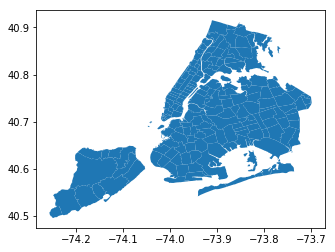

In [93]:
nyc.plot()

In [94]:
# Merging dataframes on zipcode
rest_by_zip = pd.merge(nyc, nyc_rest_grouped, on='postalCode', how='inner')

In [95]:
rest_by_zip.head()

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,BORO,RECORD DATE,Restaurants,Violations
0,1,11372.0,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,QUEENS,08/28/2017,317,337
1,2,11004.0,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...,QUEENS,08/28/2017,29,30
2,3,11040.0,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...,QUEENS,08/28/2017,19,20
3,4,11426.0,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...,QUEENS,08/28/2017,35,36
4,5,11365.0,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,...",QUEENS,08/28/2017,50,52


In [96]:
rest_by_zip['Restaurants'].sum()

25568

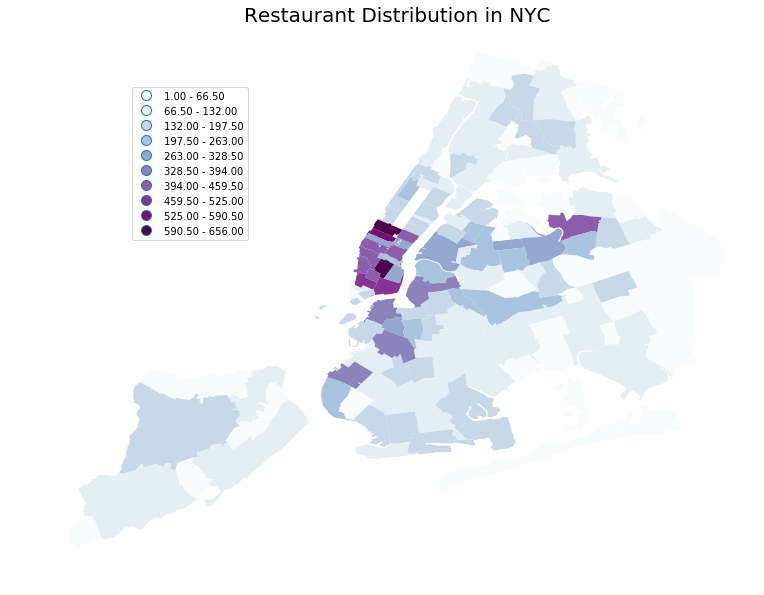

In [97]:
# Setting a variable that will the column we want to visualise on the map
restaurants = rest_by_zip['Restaurants']

# Setting a parameters for the graph
colors = 10 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)
title = 'Restaurant Distribution in NYC'
imgfile = 'Figures/nyc_zip_restaurants.png'

ax = rest_by_zip.plot(column=restaurants, 
                      cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.3, .9))


plt.savefig(imgfile)

In [98]:
# Opening population dataset
nyc_pop = pd.read_csv('resources/nyc_pop.csv')

In [99]:
# Analyzing NYC population
nyc_pop.head()

,postalCode,Population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,10028,46169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10128,62447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10075,24377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10025,97373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10023,60762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
nyc_pop = nyc_pop[['postalCode', 'Population']]
nyc_pop.head()

,postalCode,Population
0,10028,46169
1,10128,62447
2,10075,24377
3,10025,97373
4,10023,60762


In [101]:
nyc_pop.dtypes

postalCode    int64
Population    int64
dtype: object

In [102]:
pop_by_zip = pd.merge(nyc, nyc_pop, on='postalCode', how='inner')
pop_by_zip.head()

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,Population
0,1,11372.0,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,63202
1,2,11004.0,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...,14045
2,3,11040.0,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...,40799
3,4,11426.0,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...,19348
4,5,11365.0,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,...",43138


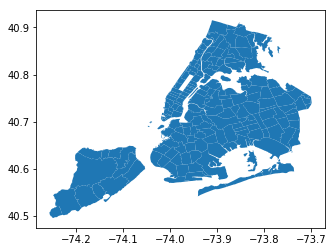

In [103]:
pop_by_zip.plot()

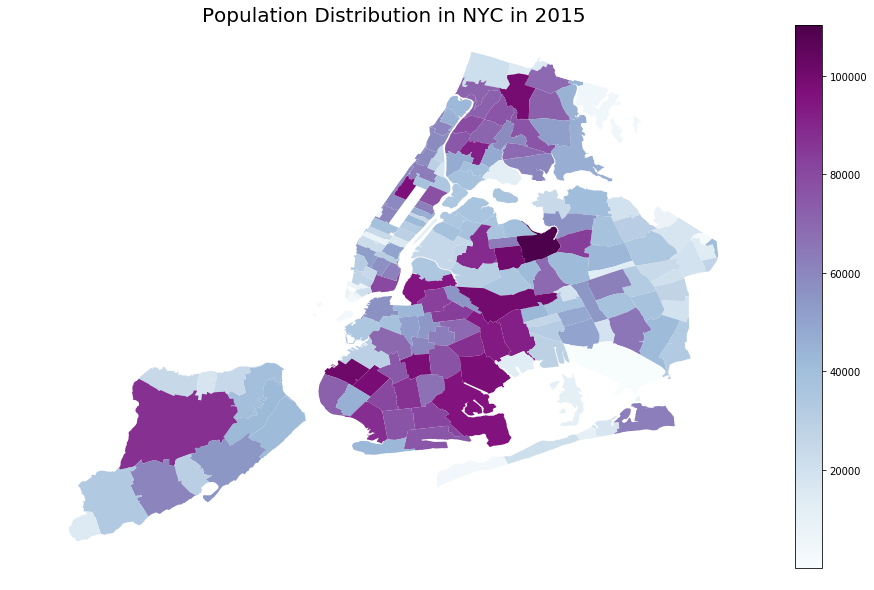

In [104]:
# Setting a variable that will the column we want to visualise on the map
population = pop_by_zip['Population']

# Setting a parameters for the graph
colors = 10 # Number of colors to represent the data
figsize = (16, 10)
cmap = 'BuPu'

title = 'Population Distribution in NYC in 2015'
imgfile = 'Figures/nyc_zip_population.png'

ax = pop_by_zip.plot(column=population, cmap=cmap, figsize=figsize, legend=True)
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.set_axis_off()

plt.savefig(imgfile)